<a href="https://colab.research.google.com/github/VivekMuraleedharanGit/Covid-detection-from-CT-scan/blob/main/Covid_19_prediction_from_chestxray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a project used for covid 19 detection from the chestxray-scan and the data-set is taken from ieee open source dataset - https://github.com/ieee8023/covid-chestxray-dataset and I'm using the kaggle data for this notebook   -https://www.kaggle.com/praveengovi/coronahack-chest-xraydataset

In [20]:
#connecting with my kaggle account
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Data Science /Kaggle'


In [21]:
%cd /content/drive/MyDrive/Data Science /Kaggle


/content/drive/MyDrive/Data Science /Kaggle


In [22]:
%ls

'COvid-19 prediction from https:  github.com ieee8023 covid-chestxray.ipynb'
 healthcare-dataset-stroke-data.csv
 kaggle.json


In [23]:
#downloading the kaggle dataset to the drive
!kaggle datasets download -d praveengovi/coronahack-chest-xraydataset


 99% 1.18G/1.19G [00:29<00:00, 66.5MB/s]
100% 1.19G/1.19G [00:29<00:00, 42.9MB/s]


In [ ]:
#unzipping the file
!unzip \*.zip  && rm *.zip


In [26]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(2)

In [27]:
#checking the data metadata file
df = pd.read_csv('/content/drive/MyDrive/Data Science /Kaggle/Chest_xray_Corona_Metadata.csv')
df.head()

Unnamed: 0   X_ray_image_name  ... Label_2_Virus_category Label_1_Virus_category
0           0  IM-0128-0001.jpeg  ...                    NaN                    NaN
1           1  IM-0127-0001.jpeg  ...                    NaN                    NaN
2           2  IM-0125-0001.jpeg  ...                    NaN                    NaN
3           3  IM-0122-0001.jpeg  ...                    NaN                    NaN
4           4  IM-0119-0001.jpeg  ...                    NaN                    NaN

[5 rows x 6 columns]

In [29]:
df.isna().sum()

Unnamed: 0                   0
X_ray_image_name             0
Label                        0
Dataset_type                 0
Label_2_Virus_category    5841
Label_1_Virus_category    1576
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5910 non-null   int64 
 1   X_ray_image_name        5910 non-null   object
 2   Label                   5910 non-null   object
 3   Dataset_type            5910 non-null   object
 4   Label_2_Virus_category  69 non-null     object
 5   Label_1_Virus_category  4334 non-null   object
dtypes: int64(1), object(5)
memory usage: 277.2+ KB


In [ ]:
df[df.Label_2_Virus_category =='COVID-19']

In [41]:
# we will fill the null values with unknown for the time being

df.fillna('unknown',inplace=True)

In [47]:
df[df.Dataset_type=='TEST']['Label_2_Virus_category'].value_counts()

unknown    624
Name: Label_2_Virus_category, dtype: int64

In [48]:
#separate the train and test data

train_data = df[df.Dataset_type=='TRAIN']
test_data = df[df.Dataset_type=="TEST"]

In [49]:
#get the img files location for both test and train data

train_img_path = '/content/drive/MyDrive/Data Science /Kaggle/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train'
test_img_path = '/content/drive/MyDrive/Data Science /Kaggle/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test'

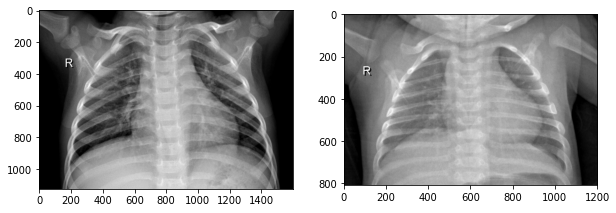

In [50]:
#potting some imgs using imshow

from PIL import Image
image_1 = Image.open(os.path.join(train_img_path,train_data
                                  ['X_ray_image_name'][2]))
image_2 = Image.open(os.path.join(train_img_path,train_data
                                  ['X_ray_image_name'][20]))
fig, ax =plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(image_1, cmap='gray');
ax[1].imshow(image_2, cmap='gray');

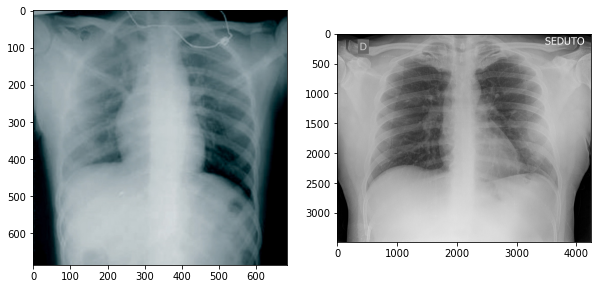

In [51]:
#sample x-ray image of person with covid-19
with_covid = train_data[train_data['Label_2_Virus_category'] == 'COVID-19']

#show sample image
samp_img1 = Image.open(os.path.join(train_img_path, with_covid['X_ray_image_name'].iloc[8]))
samp_img2 = Image.open(os.path.join(train_img_path, with_covid['X_ray_image_name'].iloc[15]))
fig, ax =plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(samp_img1);
ax[1].imshow(samp_img2);

In [55]:
train_data.Label_2_Virus_category.value_counts()

unknown          5217
COVID-19           58
Streptococcus       5
SARS                4
ARDS                2
Name: Label_2_Virus_category, dtype: int64

In [69]:
train_data.sample(10)

Unnamed: 0  ... Label_1_Virus_category
4941        4941  ...               bacteria
763          763  ...                unknown
2073        2073  ...               bacteria
3305        3305  ...               bacteria
4013        4013  ...               bacteria
1068        1068  ...                unknown
721          721  ...                unknown
701          701  ...                unknown
1658        1658  ...               bacteria
1711        1711  ...                  Virus

[10 rows x 6 columns]

In [70]:
 #final_data selection with COVID-19)
final_train_data = train_data[(train_data['Label'] == 'Normal') | 
                              ((train_data['Label'] == 'Pnemonia') &
                               (train_data['Label_2_Virus_category'] == 'COVID-19'))]

In [71]:
#creating the target variable in dataset
final_train_data['Target'] = final_train_data.Label.apply(
    lambda a: 0 if a=='Normal' else 1
)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
final_train_data[final_train_data.Target==0]

Unnamed: 0  ... Target
0              0  ...      0
1              1  ...      0
2              2  ...      0
3              3  ...      0
4              4  ...      0
...          ...  ...    ...
1337        1337  ...      0
1338        1338  ...      0
1339        1339  ...      0
1340        1340  ...      0
5241        5251  ...      0

[1342 rows x 7 columns]

In [73]:
#same decoding with test_data also
test_data['Target'] = test_data.Label.apply(lambda a : 0 if a== 'Normal' else 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [77]:
#removing unwanted features from the test and train data

final_train_data = final_train_data[['X_ray_image_name', 'Target', 'Label_2_Virus_category']]
final_test_data = test_data[['X_ray_image_name','Target']]


#The data Augmentation part

In [79]:
#create a image generator for for augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

datagen =  ImageDataGenerator(
  shear_range=0.2,
  zoom_range=0.2,
)

# function to convert image to array

def read_img(filename, size, path):
    img = image.load_img(os.path.join(path, filename), target_size=size)
    #convert image to array
    img = image.img_to_array(img) / 255
    return img

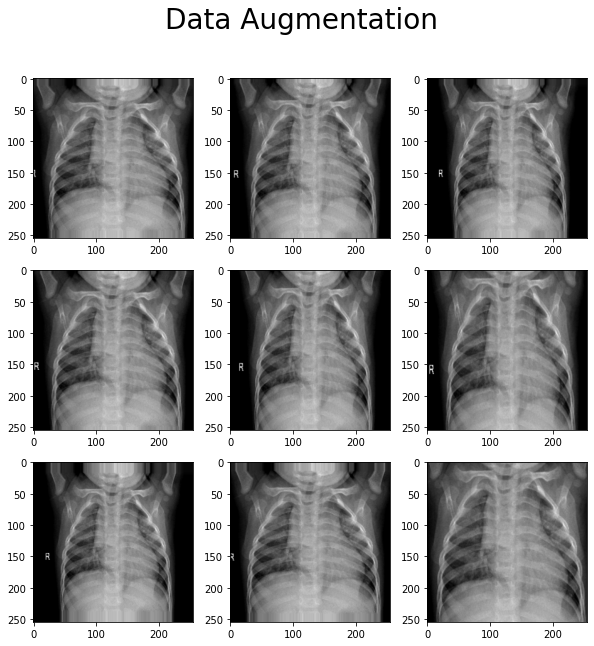

In [80]:
#read a sample image
samp_img = read_img(final_train_data['X_ray_image_name'][0],
                                 (255,255),
                                 train_img_path)

plt.figure(figsize=(10,10))
plt.suptitle('Data Augmentation', fontsize=28)

i = 0

#show augmented images
for batch in datagen.flow(tf.expand_dims(samp_img,0), batch_size=6):
    plt.subplot(3, 3, i+1)
    plt.grid(False)
    plt.imshow(batch.reshape(255, 255, 3));
    
    if i == 8:
        break
    i += 1
    
plt.show();

In [ ]:
#augment the images labeled with covid-19 to balance the data
from tqdm import tqdm


corona_df = final_train_data[final_train_data['Label_2_Virus_category'] == 'COVID-19']
with_corona_augmented = []

#create a function for augmentation
def augment(name):
    img = read_img(name, (255,255), train_img_path)
    i = 0
    for batch in tqdm(datagen.flow(tf.expand_dims(img, 0), batch_size=32)):
        with_corona_augmented.append(tf.squeeze(batch).numpy())
        if i == 20:
            break
        i =i+1

#apply the function
corona_df['X_ray_image_name'].apply(augment)

In [83]:
# extract the image from traing data and test data, then convert them as array
train_arrays = [] 
final_train_data['X_ray_image_name'].apply(lambda x: train_arrays.append(read_img(x, (255,255), train_img_path)))
test_arrays = []
final_test_data['X_ray_image_name'].apply(lambda x: test_arrays.append(read_img(x, (255,255), test_img_path)))

5286    None
5287    None
5288    None
5289    None
5290    None
        ... 
5905    None
5906    None
5907    None
5908    None
5909    None
Name: X_ray_image_name, Length: 624, dtype: object

In [85]:
#concatenate the training data labels and the labels for augmented images
y_train = np.concatenate((np.int64(final_train_data['Target'].values), np.ones(len(with_corona_augmented), dtype=np.int64)))

In [86]:
y_train

array([0, 0, 0, ..., 1, 1, 1])

Converting all datatypes tp tensors

In [88]:
train_tensors = tf.convert_to_tensor(np.concatenate((np.array(train_arrays), np.array(with_corona_augmented))))
test_tensors  = tf.convert_to_tensor(np.array(test_arrays))
y_train_tensor = tf.convert_to_tensor(y_train)
y_test_tensor = tf.convert_to_tensor(final_test_data['Target'].values)

In [89]:
#creating a tensor dataset
train_dataset = tf.data.Dataset.from_tensor_slices((train_tensors, y_train_tensor))
test_dataset = tf.data.Dataset.from_tensor_slices((test_tensors, y_test_tensor))


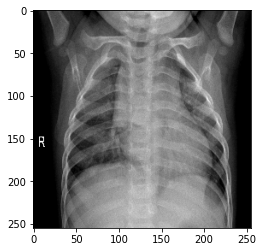

In [91]:
for i,l in train_dataset.take(1):
  plt.imshow(i)

creating batches

In [120]:
BATCH_SIZE = 16
BUFFER = 1000

train_batches = train_dataset.shuffle(BUFFER).batch(BATCH_SIZE)
test_batches = test_dataset.batch(BATCH_SIZE)

for i,l in train_batches.take(1):
    print('Train Shape per Batch: ',i.shape);
for i,l in test_batches.take(1):
    print('Test Shape per Batch: ',i.shape);

Train Shape per Batch:  (16, 255, 255, 3)
Test Shape per Batch:  (16, 255, 255, 3)


In [135]:
input_shape = (255,255,3)

#creating the basemodel as inception v3
base_model  = tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    pooling= 'avg',
    input_shape= input_shape
    
)
base_model.trainable = False
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 255, 255, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 127, 127, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 127, 127, 32) 96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 127, 127, 32) 0           batch_normalization_188[0][0]    
_______________________________________________________________________________________

Base model is ready now we can add dense layer for image classification

In [139]:
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers as Layers

model = Sequential()
model.add(base_model)
#model.add(Layers.GlobalAveragePooling())
model.add(Layers.Dense(128))
model.add(Layers.Dropout(0.05))
model.add(Layers.Dense(1,activation ='sigmoid'))
model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2048)              21802784  
_________________________________________________________________
dense_8 (Dense)              (None, 128)               262272    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 22,065,185
Trainable params: 262,401
Non-trainable params: 21,802,784
_________________________________________________________________


In [140]:
#add a earlystopping callback to stop the training if the model is not learning anymore
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

#let's just choose adam as our optimizer, we all love adam anyway.
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [141]:
model.fit(train_batches, epochs=10, validation_data=test_batches, callbacks=[callbacks])

Epoch 1/10
164/164 [==============================] - 33s 170ms/step - loss: 1.0618 - accuracy: 0.8994 - val_loss: 5.2181 - val_accuracy: 0.4087
Epoch 2/10
164/164 [==============================] - 27s 160ms/step - loss: 0.0203 - accuracy: 0.9921 - val_loss: 2.4363 - val_accuracy: 0.5337
Epoch 3/10
164/164 [==============================] - 27s 161ms/step - loss: 0.0374 - accuracy: 0.9865 - val_loss: 2.6263 - val_accuracy: 0.5240
Epoch 4/10
164/164 [==============================] - 27s 161ms/step - loss: 0.0048 - accuracy: 0.9992 - val_loss: 2.8047 - val_accuracy: 0.5192


In [148]:
#predict the test data
pred = model.predict_classes(np.array(test_arrays))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [146]:
#saving the model weights to pickle file
from keras.models import load_model

model.save('my_model.h5')

In [147]:
model = load_model('my_model.h5')

In [150]:
#let's print a classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_data['Target'], pred.flatten()))

              precision    recall  f1-score   support

           0       0.44      0.94      0.60       234
           1       0.89      0.26      0.41       390

    accuracy                           0.52       624
   macro avg       0.66      0.60      0.50       624
weighted avg       0.72      0.52      0.48       624



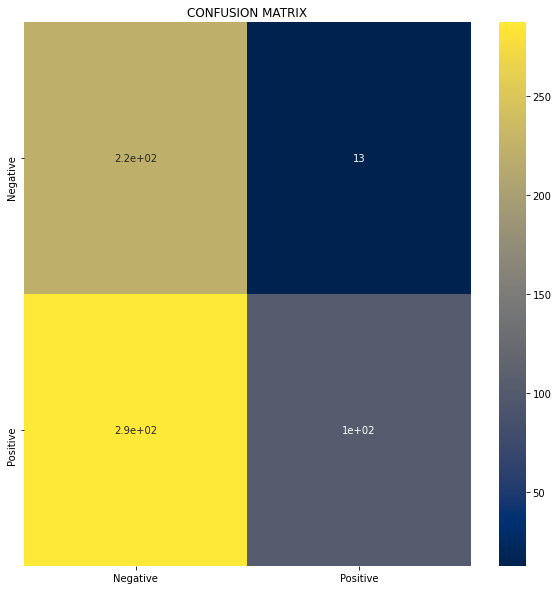

In [144]:

### lets plot confusion matrix to make it look professional
import seaborn as sns
con_mat = confusion_matrix(test_data['Target'], pred.flatten())
plt.figure(figsize = (10,10))
plt.title('CONFUSION MATRIX')
sns.heatmap(con_mat, cmap='cividis',
            yticklabels=['Negative', 'Positive'],
            xticklabels=['Negative', 'Positive'],
            annot=True);